(51.0, 49.0)


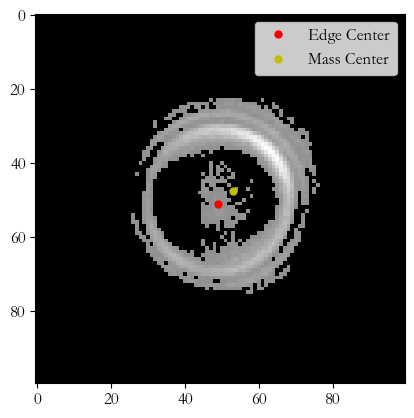

In [5]:
import numpy as np 
from PIL import Image 
from scipy.ndimage import center_of_mass 
import matplotlib.pyplot as plt 
def calculate_edge_center(binary_image):
    # 获取有效像素坐标
    rows, cols = np.where(binary_image > 0)
    if len(rows) == 0 or len(cols) == 0:
        return (0, 0)
    
    # 计算边缘中心
    min_row, max_row = np.min(rows), np.max(rows)
    min_col, max_col = np.min(cols), np.max(cols)
    edge_x = (max_col + min_col) / 2
    edge_y = (max_row + min_row) / 2
    return (edge_x, edge_y)
image = Image.open("c:\\Users\\PC\\Desktop\\final year project\\pictures\\微信图片_20241223203519.png")
dimension=image.size
gray_image = image.convert("L")
gray_values = np.array(gray_image)
threshold=np.mean(gray_values)+np.std(gray_values)
gray_values[gray_values<threshold]=0
remove_background_image=Image.fromarray(gray_values)
mass_centroid=center_of_mass(gray_values)
edge_centroid=calculate_edge_center(gray_values)
print(edge_centroid)
fig,ax=plt.subplots()
ax.imshow(remove_background_image,cmap='gray')
ax.plot(edge_centroid[1],edge_centroid[0],'ro',markersize=5,label='Edge Center')
ax.plot(mass_centroid[1],mass_centroid[0],'yo',markersize=5,label='Mass Center')
ax.legend(loc='upper right')
plt.show()

In [1]:
from PIL import Image
# 选择裁剪范围 (left, upper, right, lower)
left, upper = 25, 25
right, lower = 75, 75
# 裁剪图像
cropped_image = image.crop((left, upper, right, lower))

NameError: name 'image' is not defined

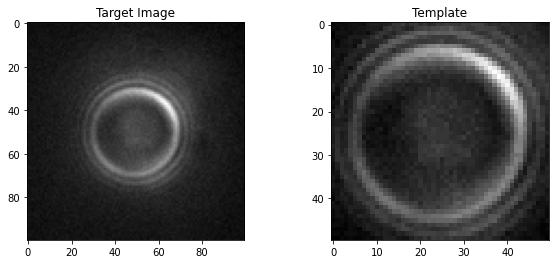

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# 读取目标图像和模板图像
template = np.array(cropped_image) # 目标图像
target_image = np.array(image)  # 模板图像

# 显示图像
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Target Image')
plt.imshow(target_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Template')
plt.imshow(template, cmap='gray')

plt.show()

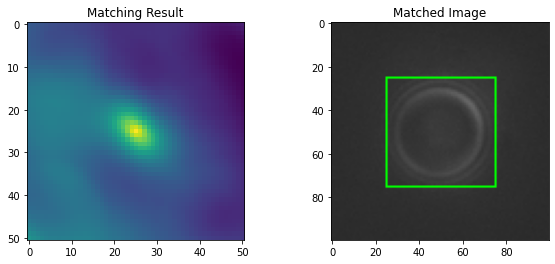

In [ ]:
# 进行模板匹配
result = cv2.matchTemplate(target_image, template, cv2.TM_CCOEFF_NORMED)

# 找到最佳匹配位置
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
top_left = max_loc  # 归一化互相关的最大值位置

# 计算模板的右下角位置
h, w = template.shape
bottom_right = (top_left[0] + w, top_left[1] + h)

# 在目标图像上绘制矩形框
matched_image = cv2.cvtColor(target_image, cv2.COLOR_GRAY2BGR)  # 转换为彩色图像以便绘制矩形
cv2.rectangle(matched_image, top_left, bottom_right, (0, 255, 0), 1)  # 绘制绿色矩形框

# 显示匹配结果
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Matching Result')
plt.imshow(result, cmap='viridis')

plt.subplot(1, 2, 2)
plt.title('Matched Image')
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))  # 转换为 RGB 格式显示

plt.show()